In [2]:
import numpy as np
import gzip
from tqdm import tqdm

In [3]:
# ! chmod +x convert_all_PE.sh
# !./convert_all_PE.sh

In [4]:
# read file1
from numpy.lib import recfunctions as rfn
import corner
def read_csv_gz(file_path):
    with gzip.open(file_path, 'rt') as f:
        data = np.genfromtxt(f, delimiter=',', names=True, dtype=None, encoding='utf-8')
    return data

In [5]:
# files_list = ['GW230529_Combined_PHM_highSpin.csv.gz',
#               "GW230529_Combined_PHM_lowSecondarySpin.csv.gz",
#               "GW200115_C01:IMRPhenomNSBH:HighSpin.csv.gz",
#               "GW200105_C01:IMRPhenomXPHM.csv.gz",
#               "GW190917_C01:IMRPhenomXPHM.csv.gz",
#               "GW190814_C01:IMRPhenomXPHM.csv.gz",
#               "GW190425_C01:IMRPhenomPv2_NRTidal:HighSpin.csv.gz"]
# for file in tqdm(files_list):
#     data = read_csv_gz(file)
#     assert np.allclose(data['logprior_truth'], data['logprior']), "logprior columns do not match"

In [6]:
df = read_csv_gz("GW190814_C01:IMRPhenomXPHM.csv.gz")

Text(0.5, 0, 'Mass2 Source')

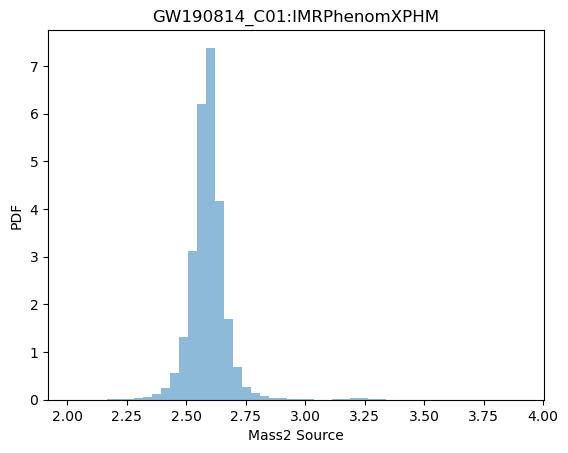

In [7]:
import matplotlib.pyplot as plt
plt.hist(df["mass2_source"], bins = 50, density=True, alpha=0.5, label="mass2_source")
plt.ylabel("PDF")
plt.title("GW190814_C01:IMRPhenomXPHM")
plt.xlabel("Mass2 Source")

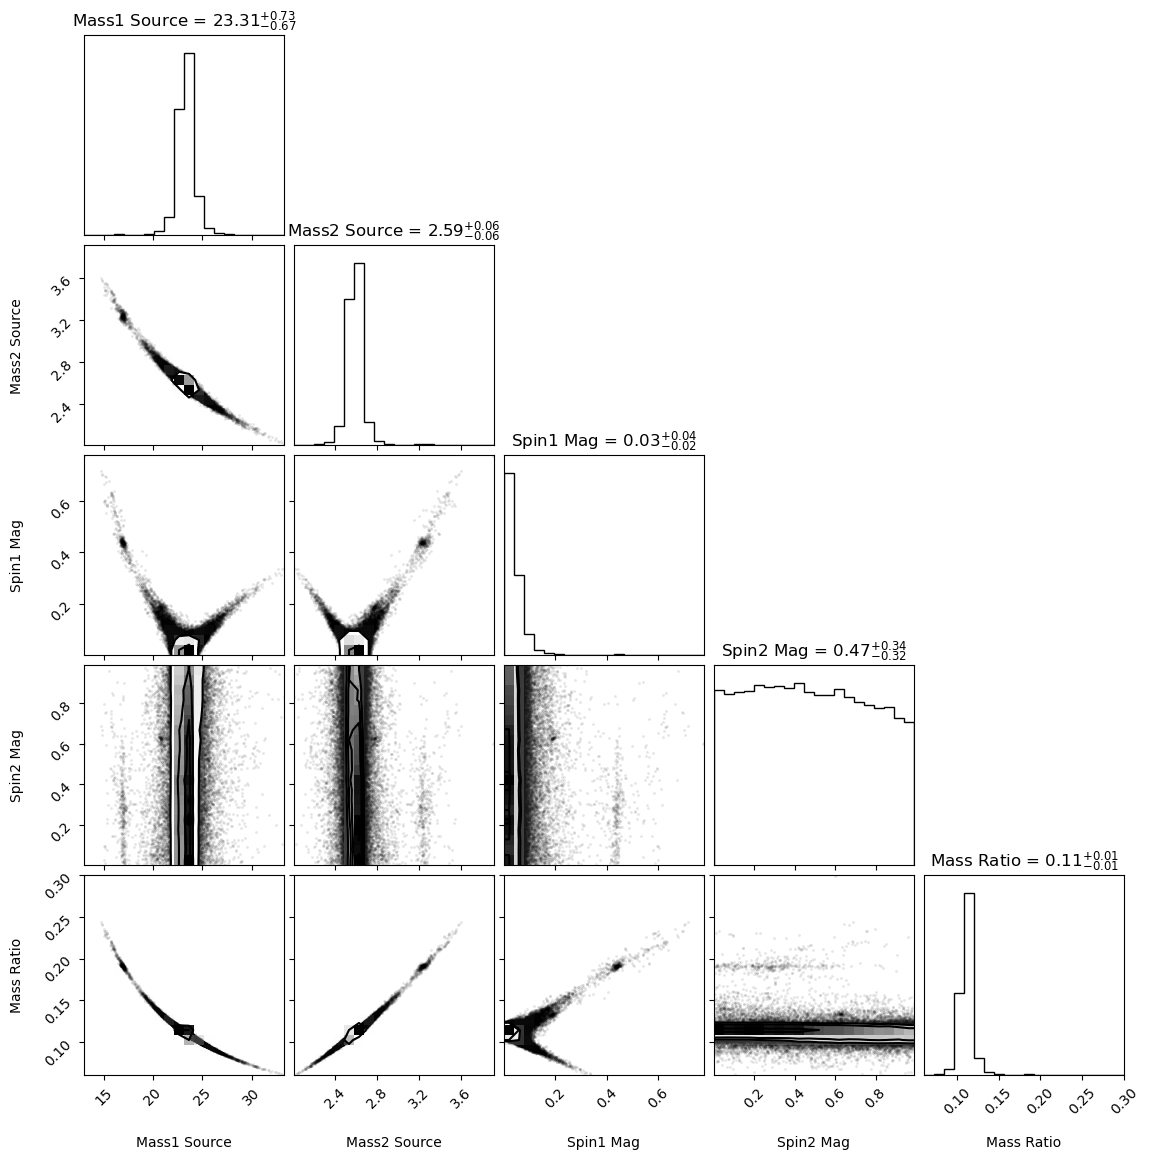

In [8]:
df = read_csv_gz("GW190814_C01:IMRPhenomXPHM.csv.gz")
q = df["mass2_source"] / df["mass1_source"]
df = rfn.append_fields(df, 'q', q, usemask=False)


data = np.vstack([
    df['mass1_source'],
    df['mass2_source'],
    df['spin1_magnitude'],
    df['spin2_magnitude'],
    df['q'],
]).T

corner.corner(
    data,
    labels=["Mass1 Source", "Mass2 Source", "Spin1 Mag", "Spin2 Mag", "Mass Ratio"],
    show_titles=True,
    title_kwargs={"fontsize": 12},
    # quantiles=None,
    # smooth=True,
    # smooth1d=True
)
plt.show()

In [10]:
df

array([(74.36953946, 244.40347145, 22.51039413, 2.63749847, 0.09444476, 0.0064012 , 1.52139565, 5.90217954, 0.87770588, 2.19694992, 0.05321571, 0.11716803),
       (73.87369724, 216.40544499, 23.33000023, 2.60623905, 5.07323253, 0.0152528 , 2.41482619, 0.62059582, 0.94221164, 1.30346047, 0.04731864, 0.11171192),
       (74.22124573, 227.56201596, 23.32709766, 2.59561294, 4.58664808, 0.02031085, 2.1336122 , 4.95956003, 0.97189554, 1.29655005, 0.04967414, 0.11127029),
       ...,
       (72.30184238, 218.85417648, 22.17192029, 2.6899501 , 4.89946572, 0.00281617, 2.5317452 , 4.53835961, 0.73489839, 2.9128005 , 0.04783629, 0.12132238),
       (71.43930767, 203.5482387 , 22.17054967, 2.70456807, 5.04488432, 0.00156655, 2.47125716, 4.24952905, 0.76021235, 3.03829459, 0.04459466, 0.12198922),
       (72.84920742, 247.63799725, 21.51859954, 2.7247639 , 0.19267341, 0.11365461, 2.851653  , 1.58054402, 0.45690741, 0.64542073, 0.05389396, 0.12662366)],
      dtype=[('logprior', '<f8'), ('luminosit

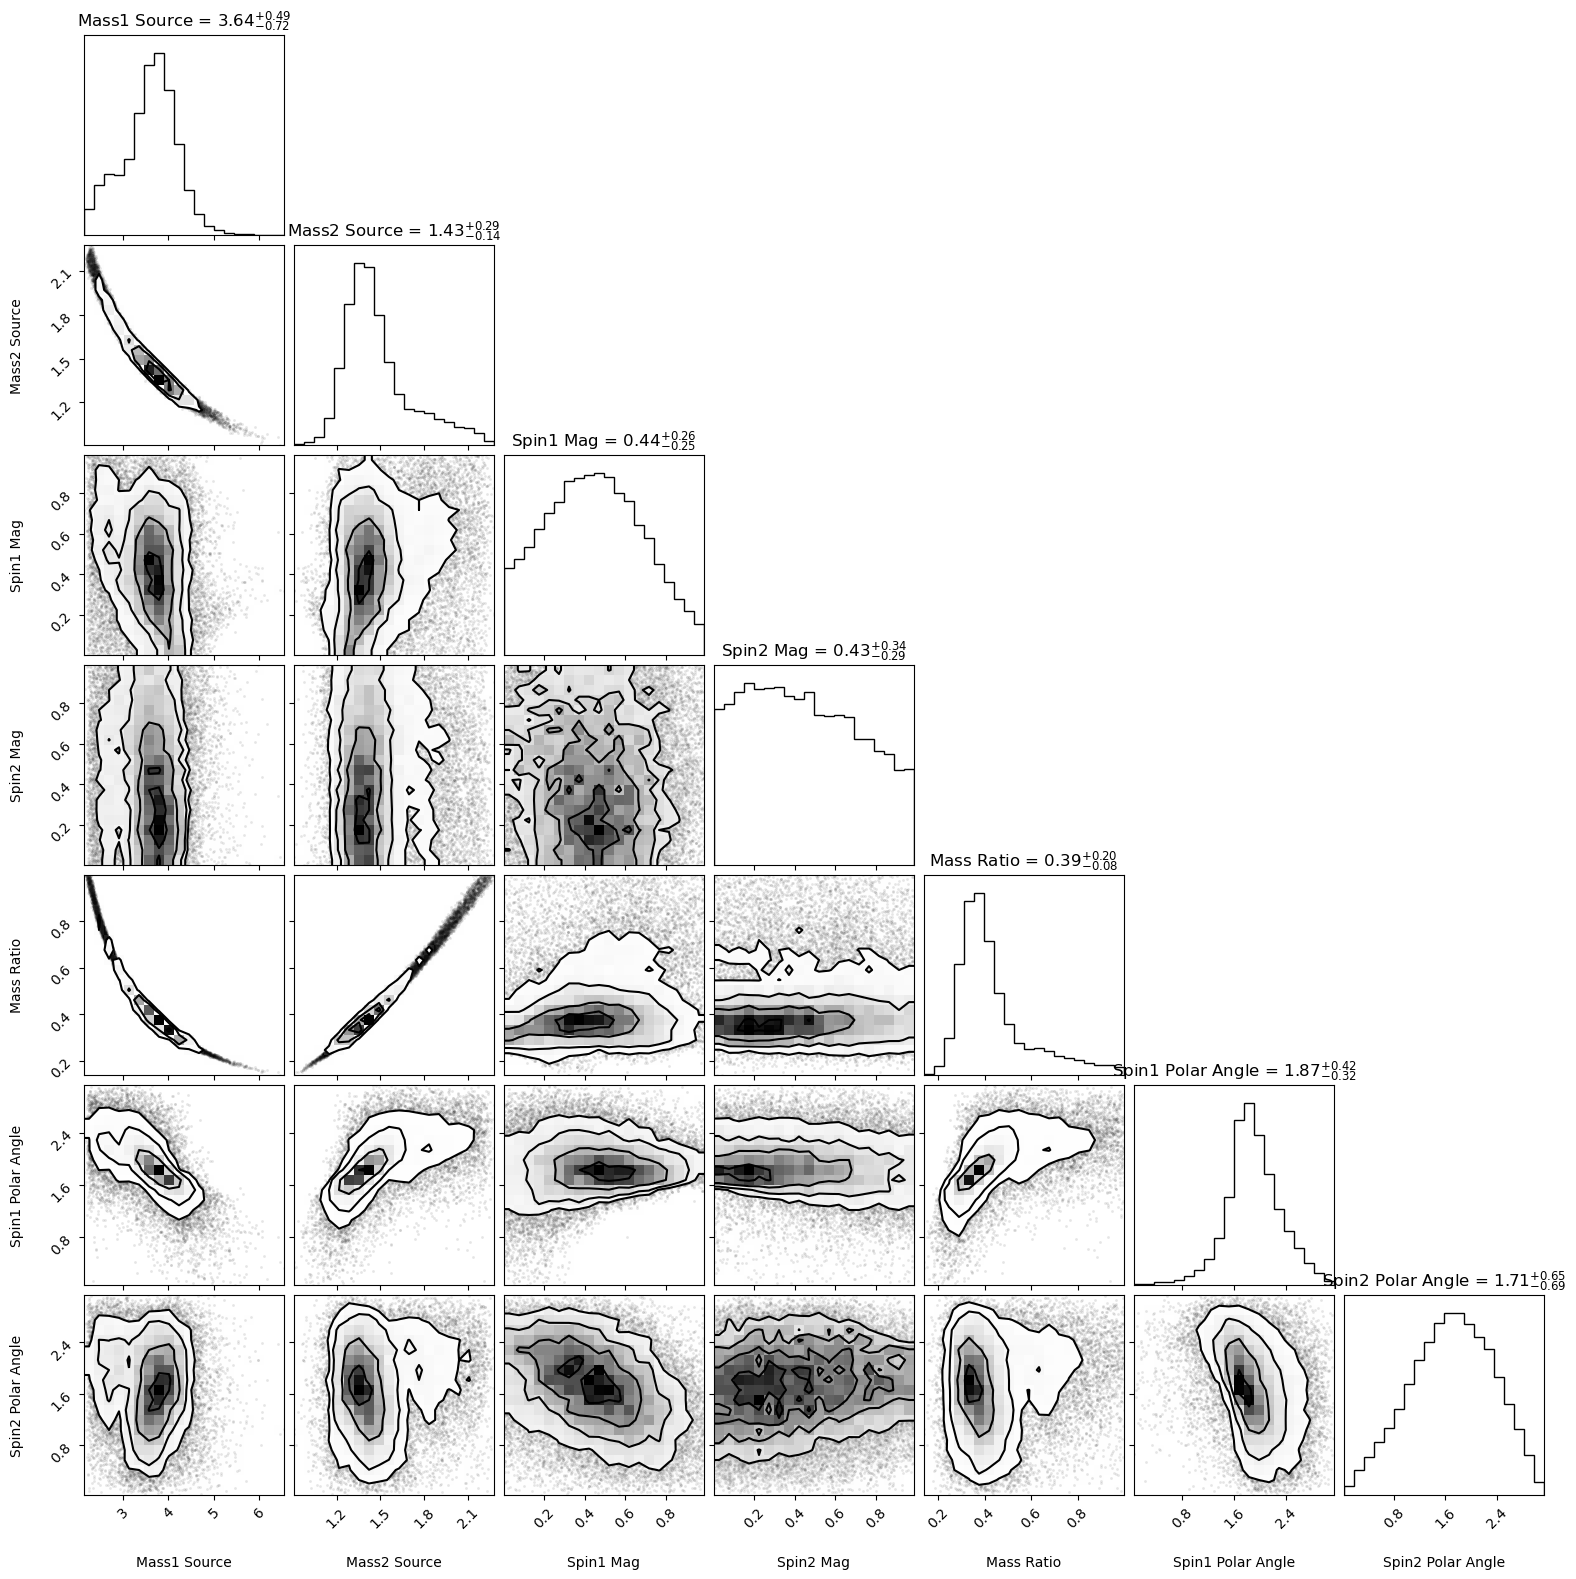

In [13]:
df = read_csv_gz("GW230529_Combined_PHM_highSpin.csv.gz")
q = df["mass2_source"] / df["mass1_source"]
df = rfn.append_fields(df, 'q', q, usemask=False)


data = np.vstack([
    df['mass1_source'],
    df['mass2_source'],
    df['spin1_magnitude'],
    df['spin2_magnitude'],
    df['q'],
    df["spin1_polar_angle"],
    df["spin2_polar_angle"],
]).T

corner.corner(
    data,
    labels=["Mass1 Source", "Mass2 Source", "Spin1 Mag", "Spin2 Mag", "Mass Ratio",
            "Spin1 Polar Angle", "Spin2 Polar Angle"],
    show_titles=True,
    title_kwargs={"fontsize": 12},
    # quantiles=None,
    # smooth=True,
    # smooth1d=True
)
plt.show()